In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_Tiergarten_multi_class

In [2]:
numNodes = Compute_Jacobian_Tiergarten_multi_class.numNodes;
numLinks = Compute_Jacobian_Tiergarten_multi_class.numLinks;
numODpairs = Compute_Jacobian_Tiergarten_multi_class.numODpairs;
numZones = Compute_Jacobian_Tiergarten_multi_class.numZones;
od_pairs = Compute_Jacobian_Tiergarten_multi_class.od_pairs;
link_list_js = Compute_Jacobian_Tiergarten_multi_class.link_list_js;
link_length_list = Compute_Jacobian_Tiergarten_multi_class.link_length_list;

In [3]:
include("../Julia_files/initia_data.jl");
include("prepare_data_Tiergarten.jl");
include("extract_data_Tiergarten.jl");
include("../Julia_files/tap_MSA_multi_class.jl");
include("../Julia_files/inverseVI_multi_class.jl");
include("../Julia_files/demands_adjustment_gradi_multi_class.jl");

In [4]:
demandsDictCar[0] = demandsDict[0]["car"];
demandsDictCar[1] = demandsDict[1]["car"];
demandsDictTruck[0] = demandsDict[0]["truck"];
demandsDictTruck[1] = demandsDict[1]["truck"];

In [5]:
demandsDiffDictCar[1] = norm(demandsDicToVec(demandsDictCar[1]) - demandsDicToVec(demandsDictCar[0]))/
norm(demandsDicToVec(demandsDictCar[0]));

demandsDiffDictTruck[1] = norm(demandsDicToVec(demandsDictTruck[1]) - demandsDicToVec(demandsDictTruck[0]))/
norm(demandsDicToVec(demandsDictTruck[0]));

In [6]:
demandsVecDictCar[0] = demandsDicToVec(demandsDictCar[0]);
demandsVecDictTruck[0] = demandsDicToVec(demandsDictTruck[0]);

In [7]:
demandsVecDictCar

Dict{Any,Any} with 1 entry:
  0 => [18.072,14.656,17.456,12.176,2.984,0.08,0.248,0.976,0.416,0.168  …  5.99…

In [8]:
demandsVecDictTruck

Dict{Any,Any} with 1 entry:
  0 => [4.518,3.664,4.364,3.044,0.746,0.02,0.062,0.244,0.104,0.042  …  1.498,2.…

In [9]:
fcoeffs = [1, 0, 0, 0, 1];

# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA_Multi(demandsDictCar[0], demandsDictTruck[0], fcoeffs);

In [10]:
tapFlowDicDict[0]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((248,65),395.656),Pair{Any,Any}((137,1…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((248,65),98.914),Pair{Any,Any}((137,10…

In [11]:
tapFlowVecDict[0]

2×766 Array{Float64,2}:
 32.9041  118.439   612.298  0.0  547.093   …  3.17326   29.9437   58.9791
  8.224    29.6097  152.431  0.0   97.4636     0.793226   7.48221  14.7385

In [12]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/Tiergarten_net.txt", tapFlowDicDict[0]);

In [13]:
arcsDict[0]

Dict{Any,Any} with 766 entries:
  (248,65)  => Arc(248,65,900.0,17.0,593.484,395.656,98.914)
  (137,106) => Arc(137,106,2800.0,1.66667,268.764,179.176,44.794)
  (267,256) => Arc(267,256,2400.0,7.33333,104.42,69.6041,17.4079)
  (354,353) => Arc(354,353,900.0,1.0,344.967,229.883,57.5423)
  (56,55)   => Arc(56,55,600.0,0.333333,0.0,0.0,0.0)
  (259,255) => Arc(259,255,2400.0,0.666667,0.0,0.0,0.0)
  (125,177) => Arc(125,177,900.0,1.66667,0.0,0.0,0.0)
  (36,35)   => Arc(36,35,2800.0,0.333333,23.5704,15.7155,3.92747)
  (183,184) => Arc(183,184,900.0,0.333333,0.0,0.0,0.0)
  (43,361)  => Arc(43,361,2800.0,12.6667,7.81583,5.21975,1.29804)
  (16,277)  => Arc(16,277,999999.0,0.0,1833.91,1221.37,306.267)
  (298,307) => Arc(298,307,2400.0,1.0,1799.71,1200.47,299.619)
  (31,34)   => Arc(31,34,2800.0,0.666667,130.308,86.8762,21.7158)
  (187,191) => Arc(187,191,600.0,0.666667,274.182,182.788,45.6969)
  (241,244) => Arc(241,244,2400.0,0.333333,0.0,0.0,0.0)
  (84,95)   => Arc(84,95,900.0,2.33333,0.0,0.0,

In [14]:
deg = 7
c = 1.5
lam = 0.1

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDictCar[1], demandsDictTruck[1], 
arcsDict[0]);

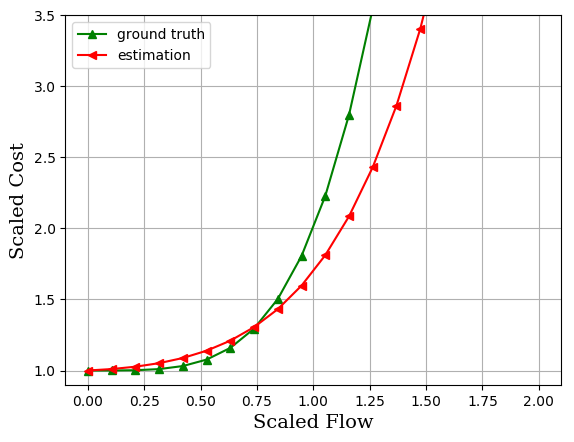

In [15]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Tiergarten_iter_$(iterN)_multi_class.pdf")

In [16]:
demandsVecDictCar[1] = demandsDicToVec(demandsDictCar[1]);
demandsVecDictTruck[1] = demandsDicToVec(demandsDictTruck[1]);

objFunDict[1] = objF(demandsVecDictCar[1], demandsVecDictTruck[1], coeffs_dict[(deg, c, lam, 1)]);

In [17]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA_Multi(demandsDictCar[1], demandsDictTruck[1], 
coeffs_dict[(deg, c, lam, 1)]);

In [18]:
tapFlowDicDict[1]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((248,65),410.026),Pair{Any,Any}((137,1…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((248,65),102.506),Pair{Any,Any}((137,1…

In [19]:
tapFlowVecDict[1] 

2×766 Array{Float64,2}:
 32.1027   117.603   600.385  0.0  488.12   …  3.10928   30.1084   58.7823
  8.02566   29.4453  145.237  0.0   90.377     0.776946   7.52147  14.6975

In [20]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/Tiergarten_net.txt", tapFlowDicDict[1]);

In [21]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], coeffs_dict[(deg, c, lam, 1)]);

In [22]:
linkCostDicDict[1]["car"]

Dict{Any,Any} with 766 entries:
  "1"   => 0.0
  "519" => 5.0
  "599" => 0.0
  "491" => 5.33333
  "228" => 6.0
  "332" => 15.3155
  "190" => 7.33333
  "227" => 0.0
  "297" => 1.66667
  "605" => 35.6667
  "24"  => 0.0
  "204" => 15.7672
  "416" => 8.33333
  "23"  => 0.0
  "160" => 2.02874
  "561" => 0.333333
  "253" => 4.76916
  "39"  => 0.0
  "112" => 0.669255
  "372" => 10.1318
  "34"  => 0.0
  "137" => 0.333333
  "590" => 26.6667
  "55"  => 0.0
  "323" => 1.0
  ⋮     => ⋮

In [23]:
linkCostDicDict[1]["truck"]

Dict{Any,Any} with 766 entries:
  "1"   => 0.0
  "519" => 5.5
  "599" => 0.0
  "491" => 5.86667
  "228" => 6.6
  "332" => 16.847
  "190" => 8.06667
  "227" => 0.0
  "297" => 1.83333
  "605" => 39.2333
  "24"  => 0.0
  "204" => 17.3439
  "416" => 9.16667
  "23"  => 0.0
  "160" => 2.23161
  "561" => 0.366666
  "253" => 5.24607
  "39"  => 0.0
  "112" => 0.73618
  "372" => 11.145
  "34"  => 0.0
  "137" => 0.366666
  "590" => 29.3333
  "55"  => 0.0
  "323" => 1.1
  ⋮     => ⋮

In [24]:
link_length_list

766-element Array{Any,1}:
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   ⋮  
  15.0
 428.0
   0.0
 137.0
 300.0
  18.0
  81.0
  41.0
  27.0
 327.0
 363.0
  70.0

In [25]:
link_length_list_car = [linkCostDicDict[1]["car"]["$(i)"] for i=0:numLinks-1]
link_length_list_truck = [linkCostDicDict[1]["truck"]["$(i)"] for i=0:numLinks-1]

link_length_list_dict[0] = link_length_list_car
link_length_list_dict[1] = link_length_list_truck

link_length_list_dict_dict[1] = link_length_list_dict

Dict{Any,Any} with 2 entries:
  0 => [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,3.66667,13.6677,0.33333…
  1 => [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,4.03333,15.0345,0.36666…

In [26]:
jacobiSpiessDict[1] = Compute_Jacobian_Tiergarten_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
link_list_js, link_length_list_dict_dict[1]);

In [27]:
jacobiSpiessDict[1]

650×766×2 Array{Float64,3}:
[:, :, 1] =
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0

In [28]:
# maximum number of iterations
N = 50;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [29]:
for iterNumber = 1:N
    
    l = iterNumber;
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);
    
    demandsVecDictCar[l] = demandsDicToVec(demandsDictCar[l]);
    demandsVecDictTruck[l] = demandsDicToVec(demandsDictTruck[l]);

    searchDirecDict[l] = searchDirec(demandsVecDictCar[l], demandsVecDictTruck[l], descDirecDict[l], epsilon_1);
    
    thetaMaxDict[l] = thetaMax(demandsVecDictCar[l], demandsVecDictTruck[l], searchDirecDict[l]);
    
    demandsVecDictCar[l+1] = similar(demandsVecDictCar[0]);
    demandsVecDictTruck[l+1] = similar(demandsVecDictTruck[0]);
    
    demandsVecDictCar[l+1], demandsVecDictTruck[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDictCar[l], 
    demandsVecDictTruck[l], coeffs_dict[(deg, c, lam, l)], searchDirecDict[l], thetaMaxDict[l], rho, M);
        
    demandsDictCar[l+1] = demandsVecToDic(demandsVecDictCar[l+1]);
    demandsDictTruck[l+1] = demandsVecToDic(demandsVecDictTruck[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA_Multi(demandsDictCar[l+1], demandsDictTruck[l+1], 
    coeffs_dict[(deg, c, lam, l)]);
        
    arcsDict[l+1] = observFlow("./benchmark_data/Tiergarten_net.txt", tapFlowDicDict[l+1]);
        
    coeffs_dict[(deg, c, lam, l+1)], objInvVIDict[l+1] = train(lam, deg, c, demandsDictCar[l+1], 
    demandsDictTruck[l+1], arcsDict[0]);
    
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], coeffs_dict[(deg, c, lam, l+1)]);
        
    #######################################
    link_length_list_dict[0] = [linkCostDicDict[l+1]["car"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict[1] = [linkCostDicDict[l+1]["truck"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict_dict[l+1] = link_length_list_dict
    #######################################
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_Tiergarten_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, 
    od_pairs, link_list_js, link_length_list_dict_dict[l+1]);
        
    demandsDiffDictCar[l+1] = norm(demandsVecDictCar[l+1] - demandsVecDictCar[0]) / norm(demandsVecDictCar[0]);
    demandsDiffDictTruck[l+1] = norm(demandsVecDictTruck[l+1] - demandsVecDictTruck[0]) / 
    norm(demandsVecDictTruck[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
        
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [30]:
demandsVecDictCar

Dict{Any,Any} with 7 entries:
  0 => [18.072,14.656,17.456,12.176,2.984,0.08,0.248,0.976,0.416,0.168  …  5.99…
  4 => [16.7045,14.5627,18.2085,11.4988,3.14091,0.0756606,0.254475,1.0162,0.384…
  2 => [16.7076,14.5624,18.2042,11.5011,3.13542,0.0741934,0.258411,1.02104,0.39…
  3 => [16.7045,14.5627,18.2085,11.4988,3.14091,0.0756594,0.254477,1.0162,0.384…
  5 => [16.7045,14.5627,18.2085,11.4988,3.14094,0.0756768,0.254453,1.01617,0.38…
  6 => [16.7045,14.5627,18.2085,11.4988,3.14094,0.0756768,0.254453,1.01617,0.38…
  1 => [16.7082,14.5624,18.2035,11.5016,3.13454,0.0740047,0.259109,1.0219,0.391…

In [31]:
demandsVecDictTruck

Dict{Any,Any} with 7 entries:
  0 => [4.518,3.664,4.364,3.044,0.746,0.02,0.062,0.244,0.104,0.042  …  1.498,2.…
  4 => [4.17874,3.64409,4.55385,2.87819,0.78865,0.0220904,0.067019,0.257403,0.0…
  2 => [4.17735,3.64108,4.5513,2.87578,0.784336,0.0189916,0.0650922,0.255749,0.…
  3 => [4.17874,3.64409,4.55384,2.87819,0.788648,0.022089,0.0670182,0.257402,0.…
  5 => [4.17875,3.64411,4.55386,2.8782,0.788674,0.0221093,0.067029,0.257411,0.0…
  6 => [4.17875,3.64411,4.55386,2.8782,0.788674,0.0221093,0.067029,0.257411,0.0…
  1 => [4.17706,3.6406,4.55088,2.87539,0.783635,0.0185012,0.0647773,0.255474,0.…

In [32]:
norObjFunDict

Dict{Any,Any} with 6 entries:
  4 => 0.946806
  2 => 0.985806
  3 => 0.97362
  5 => 0.942817
  6 => 0.942817
  1 => 1.0

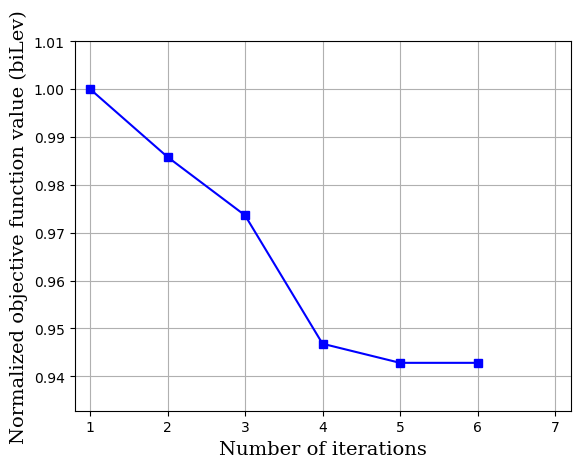

In [33]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_Tiergarten.pdf")

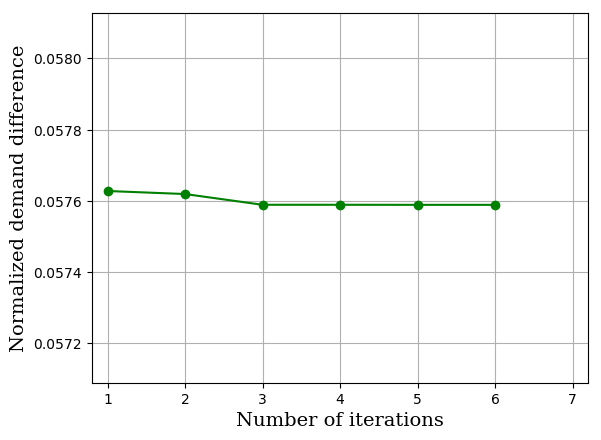

In [34]:
using PyPlot

iterNum = 1:(length(demandsDiffDictCar))

demandsDiff = map(iterNum->demandsDiffDictCar[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictCar) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Tiergarten_car.pdf")

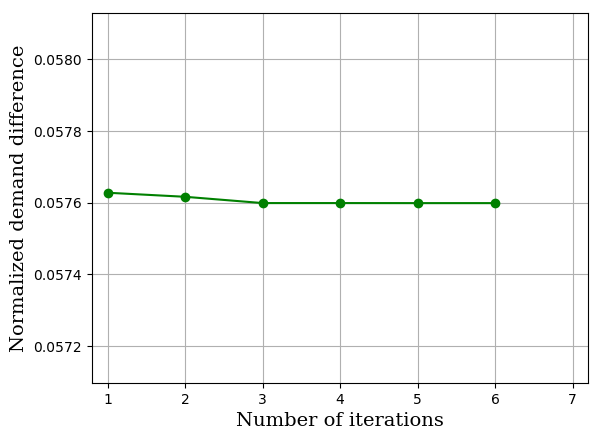

In [35]:
using PyPlot

iterNum = 1:(length(demandsDiffDictTruck))

demandsDiff = map(iterNum->demandsDiffDictTruck[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictTruck) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Tiergarten_truck.pdf")

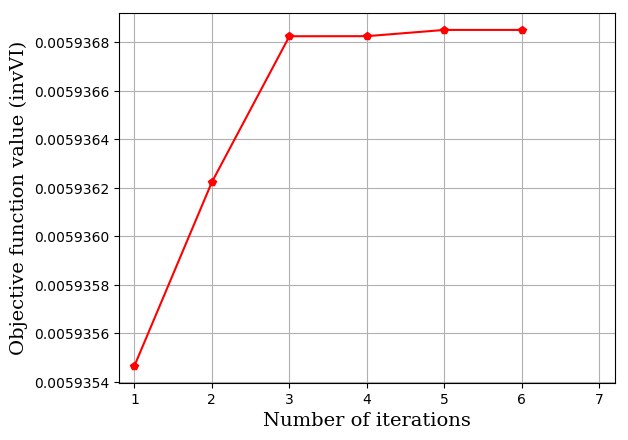

In [36]:
using PyPlot

iterNum = 1:(length(objInvVIDict))

objFun = map(iterNum->objInvVIDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "p-r")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0.8, length(objInvVIDict) + 1 + .2)
# ylim(0.9, 2.0)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value (invVI)", fontdict=font1)

savefig("./results/objFun_invVI_Tiergarten.pdf")

In [37]:
coeffs_dict

Dict{Any,Any} with 6 entries:
  (7,1.5,0.1,3) => [1.0,0.0739359,0.20164,0.222042,0.139366,0.0531968,0.0117368…
  (7,1.5,0.1,6) => [1.0,0.0739459,0.201671,0.222077,0.139388,0.0532052,0.011738…
  (7,1.5,0.1,5) => [1.0,0.0739459,0.201671,0.222077,0.139388,0.0532052,0.011738…
  (7,1.5,0.1,1) => [1.0,0.0736329,0.20008,0.220116,0.138112,0.0527147,0.0116313…
  (7,1.5,0.1,4) => [1.0,0.0739362,0.20164,0.222043,0.139366,0.0531969,0.0117368…
  (7,1.5,0.1,2) => [1.0,0.0736346,0.20086,0.221242,0.138911,0.0530454,0.0117089…

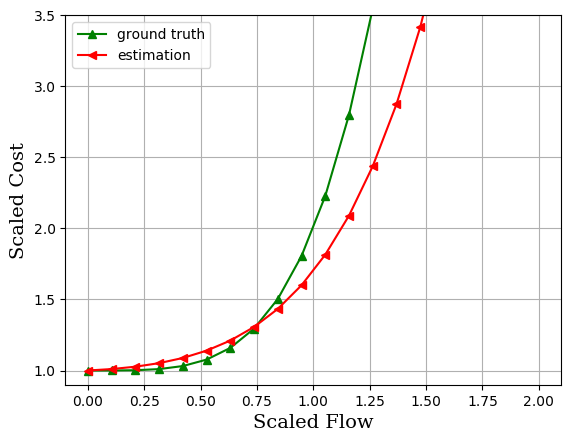

In [38]:
using PyPlot

iterN = 2

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Tiergarten_iter_$(iterN)_multi_class.pdf")

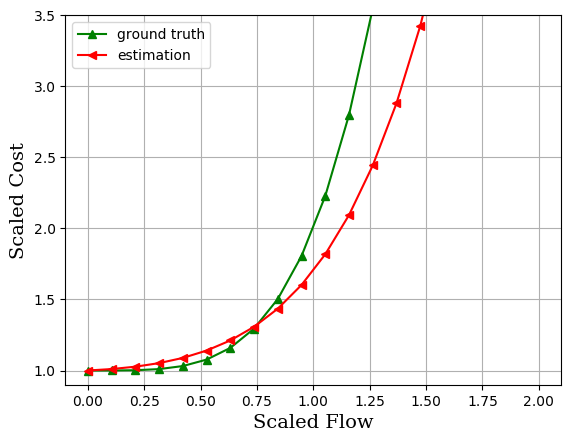

In [39]:
using PyPlot

iterN = 3

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Tiergarten_iter_$(iterN)_multi_class.pdf")

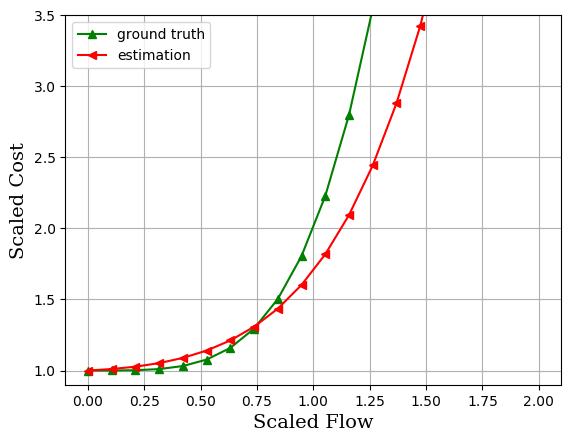

In [40]:
using PyPlot

iterN = length(coeffs_dict)

true_coeffs = [1, 0, 0, 0, 1]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Tiergarten_iter_$(iterN)_multi_class.pdf")

In [41]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [42]:
outfile = open("./results/demandsDiffDictCar.json", "w")

JSON.print(outfile, demandsDiffDictCar)

close(outfile)

In [43]:
outfile = open("./results/demandsDiffDictTruck.json", "w")

JSON.print(outfile, demandsDiffDictTruck)

close(outfile)

In [44]:
outfile = open("./results/objInvVIDict.json", "w")

JSON.print(outfile, objInvVIDict)

close(outfile)

In [45]:
outfile = open("./results/coeffs_dict.json", "w")

JSON.print(outfile, coeffs_dict)

close(outfile)

In [46]:
outfile = open("./results/demandsVecDictCar.json", "w")

JSON.print(outfile, demandsVecDictCar)

close(outfile)

In [47]:
outfile = open("./results/demandsVecDictTruck.json", "w")

JSON.print(outfile, demandsVecDictTruck)

close(outfile)

In [48]:
outfile = open("./results/demandsDictCar.json", "w")

JSON.print(outfile, demandsDictCar)

close(outfile)

In [49]:
outfile = open("./results/demandsDictTruck.json", "w")

JSON.print(outfile, demandsDictTruck)

close(outfile)

In [50]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [51]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)